<a href="https://colab.research.google.com/github/geworgia/ML_challenge/blob/main/d2-titanic_surv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Source: openml & UCI
## Initial format: ARFF

The original Titanic dataset, detailing the survival status of individual passengers, excludes crew information but includes actual ages for half of the passengers. Sourced primarily from the Encyclopedia Titanica, the dataset was initially compiled by various researchers, including Eaton & Haas (1994), and later updated by Thomas Cason of UVa, who removed duplicates, corrected errors, filled in missing ages, and added new variables. The dataset features variables such as *pclass* (passenger class), *survived*, *name*, *age*, *embarked*, *home.dest*, *room*, *ticket*, *boat*, and *sex*, with *pclass* serving as a proxy for socio-economic status. A secondary dataset, *titanic2*, includes crew records and dichotomizes age as adult or child. These datasets are valuable for demonstrating statistical functions in Hmisc and binary logistic regression using the Design library, as highlighted in Simonoff (1997). For more details, visit the Vanderbilt Biostatistics resource page.

In [1]:
import os

# Path to the .arff file
path_to_file = "/content/titanic.arff"

def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Process the single .arff file
with open(path_to_file, "r") as inFile:
    content = inFile.readlines()
    name, ext = os.path.splitext(inFile.name)
    new = toCsv(content)
    with open(name + ".csv", "w") as outFile:
        outFile.writelines(new)

## import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid", palette="YlOrBr")

In [3]:
df = pd.read_csv('titanic.csv')
print(df.head())

   'pclass'  'survived'                                           'name'  \
0         1           1                    Allen, Miss. Elisabeth Walton   
1         1           1                   Allison, Master. Hudson Trevor   
2         1           0                     Allison, Miss. Helen Loraine   
3         1           0             Allison, Mr. Hudson Joshua Creighton   
4         1           0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   

    'sex'   'age'  'sibsp'  'parch' 'ticket'    'fare'  'cabin' 'embarked'  \
0  female      29        0        0    24160  211.3375       B5          S   
1    male  0.9167        1        2   113781    151.55  C22 C26          S   
2  female       2        1        2   113781    151.55  C22 C26          S   
3    male      30        1        2   113781    151.55  C22 C26          S   
4  female      25        1        2   113781    151.55  C22 C26          S   

  'boat' 'body'                      'home.dest'  
0      2      ?        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   'pclass'     1309 non-null   int64 
 1   'survived'   1309 non-null   int64 
 2   'name'       1309 non-null   object
 3   'sex'        1309 non-null   object
 4   'age'        1309 non-null   object
 5   'sibsp'      1309 non-null   int64 
 6   'parch'      1309 non-null   int64 
 7   'ticket'     1309 non-null   object
 8   'fare'       1309 non-null   object
 9   'cabin'      1309 non-null   object
 10  'embarked'   1309 non-null   object
 11  'boat'       1309 non-null   object
 12  'body'       1309 non-null   object
 13  'home.dest'  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [5]:
df.describe()

,'pclass','survived','sibsp','parch'
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


In [6]:
df.columns

Index([''pclass'', ''survived'', ''name'', ''sex'', ''age'', ''sibsp'',
       ''parch'', ''ticket'', ''fare'', ''cabin'', ''embarked'', ''boat'',
       ''body'', ''home.dest''],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip("'")
print(df.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [8]:
df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0


<ipython-input-9-0595ff8dd0fe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, palette="YlOrBr")
<ipython-input-9-0595ff8dd0fe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, palette="YlOrBr")
<ipython-input-9-0595ff8dd0fe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, palette="YlOrBr")
<ipython-input-9-0595ff8dd0fe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False

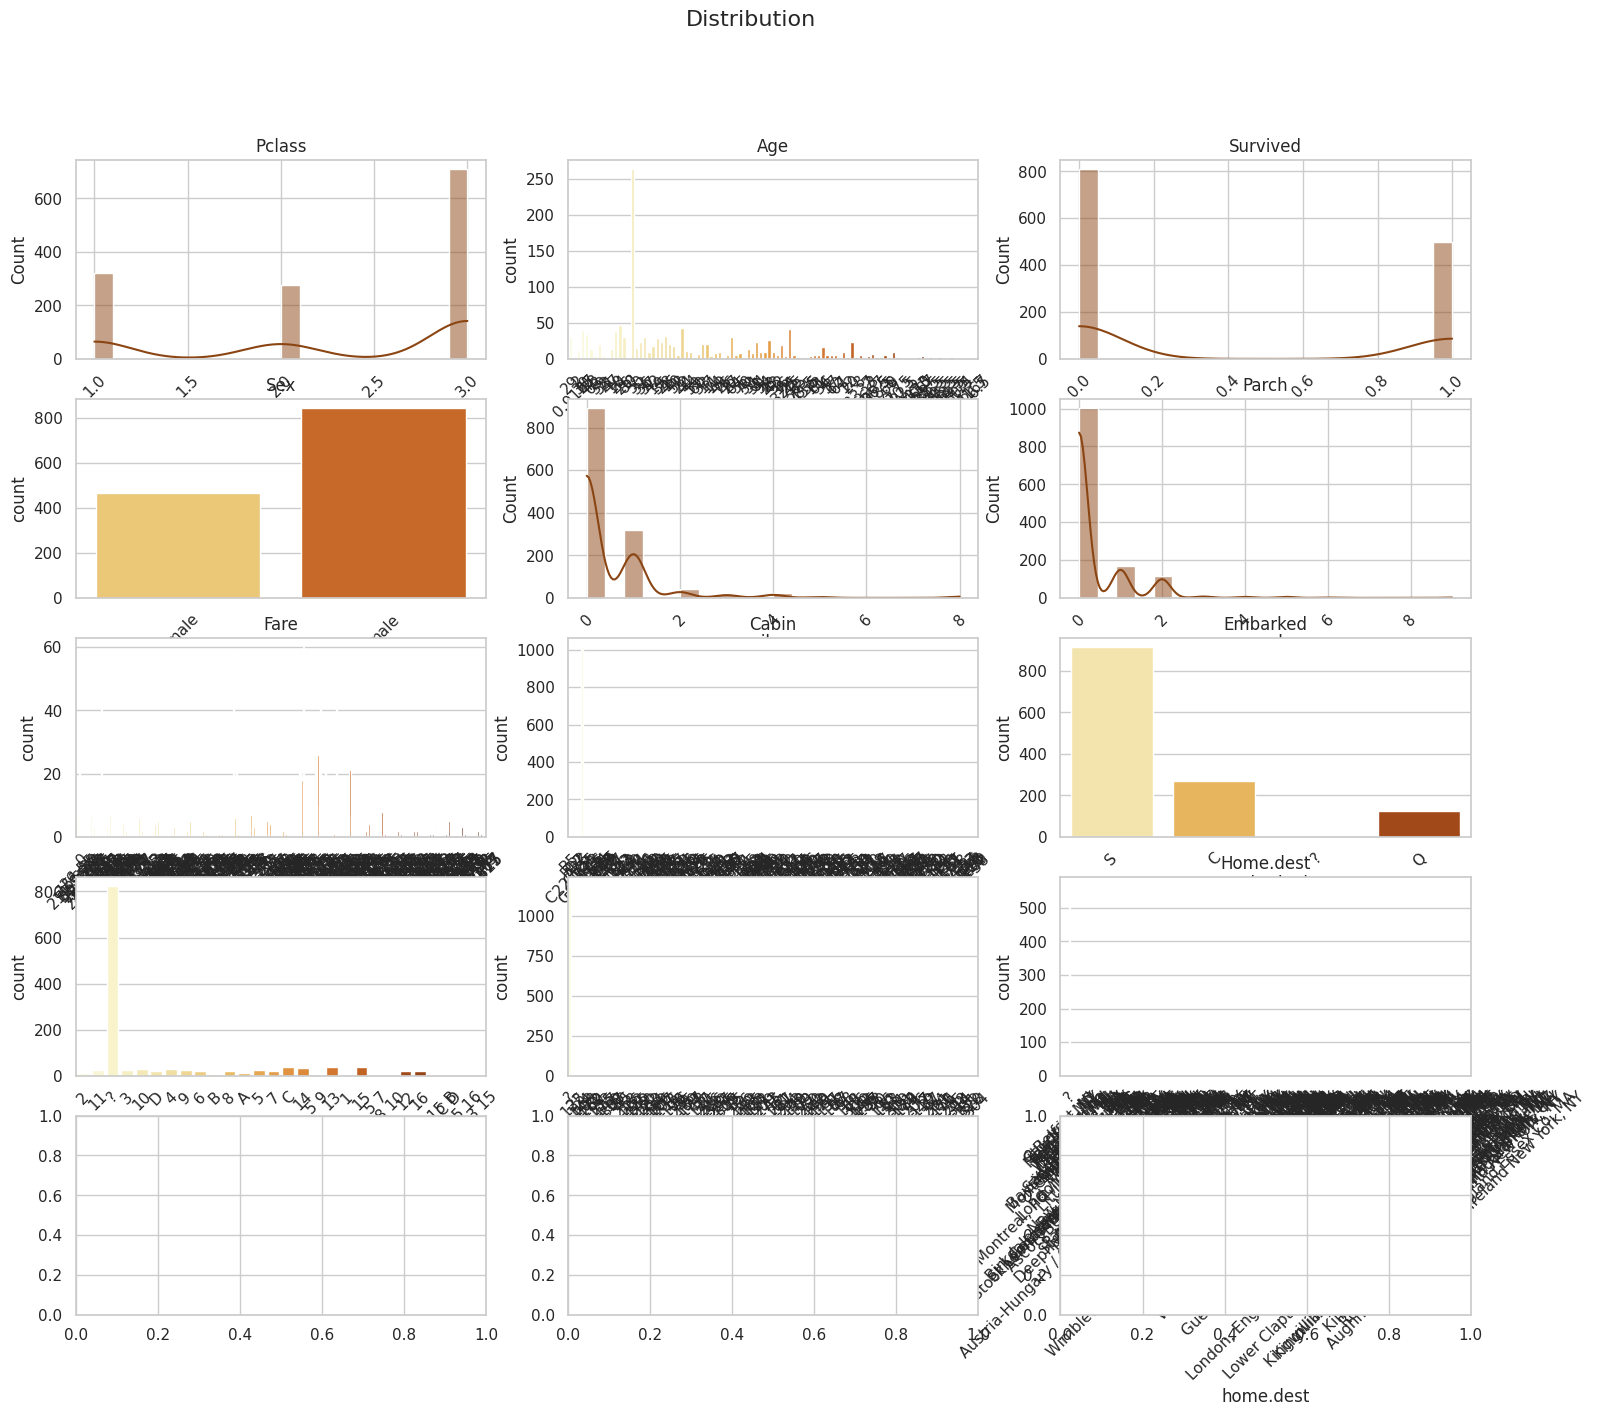

In [9]:
fig, axes = plt.subplots(5, 3, figsize=(18, 15))
fig.suptitle("Distribution", fontsize=16)

columns = ['pclass', 'age', 'survived', 'sex', 'sibsp', 'parch', 'fare', 'cabin',
           'embarked', 'boat', 'body', 'home.dest']

for ax, col in zip(axes.flatten(), columns):
    if df[col].dtype == 'object':
        sns.countplot(x=df[col], ax=ax, palette="YlOrBr")
    else:
        sns.histplot(df[col], bins=20, kde=True, ax=ax, color="saddlebrown")
    ax.set_title(col.capitalize())
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [10]:
print(df['age'].unique())

['29' '0.9167' '2' '30' '25' '48' '63' '39' '53' '71' '47' '18' '24' '26'
 '80' '?' '50' '32' '36' '37' '42' '19' '35' '28' '45' '40' '58' '22' '41'
 '44' '59' '60' '33' '17' '11' '14' '49' '76' '46' '27' '64' '55' '70'
 '38' '51' '31' '4' '54' '23' '43' '52' '16' '32.5' '21' '15' '65' '28.5'
 '45.5' '56' '13' '61' '34' '6' '57' '62' '67' '1' '12' '20' '0.8333' '8'
 '0.6667' '7' '3' '36.5' '18.5' '5' '66' '9' '0.75' '70.5' '22.5' '0.3333'
 '0.1667' '40.5' '10' '23.5' '34.5' '20.5' '30.5' '55.5' '38.5' '14.5'
 '24.5' '60.5' '74' '0.4167' '11.5' '26.5']


It's clear that visualization not suitable with variable that contains many data.

In [11]:
print(df['fare'].unique())

['211.3375' '151.55' '26.55' '77.9583' '0' '51.4792' '49.5042' '227.525'
 '69.3' '78.85' '30' '25.925' '247.5208' '76.2917' '75.2417' '52.5542'
 '221.7792' '26' '91.0792' '135.6333' '35.5' '31' '164.8667' '262.375'
 '55' '30.5' '50.4958' '39.6' '27.7208' '134.5' '26.2875' '27.4458'
 '512.3292' '5' '47.1' '120' '61.175' '53.1' '86.5' '29.7' '136.7792' '52'
 '25.5875' '83.1583' '25.7' '71' '71.2833' '57' '81.8583' '106.425'
 '56.9292' '78.2667' '31.6792' '31.6833' '110.8833' '26.3875' '27.75'
 '263' '133.65' '49.5' '79.2' '38.5' '211.5' '59.4' '89.1042' '34.6542'
 '28.5' '153.4625' '63.3583' '55.4417' '76.7292' '42.4' '83.475' '93.5'
 '42.5' '51.8625' '50' '57.9792' '90' '30.6958' '80' '28.7125' '25.9292'
 '39.4' '45.5' '146.5208' '82.1708' '57.75' '113.275' '26.2833' '108.9'
 '25.7417' '61.9792' '66.6' '40.125' '55.9' '60' '82.2667' '32.3208'
 '79.65' '28.5375' '33.5' '34.0208' '75.25' '77.2875' '61.3792' '35' '24'
 '13' '11.5' '10.5' '12.525' '39' '29' '21' '13.5' '26.25' '36.75' '73.5

In [12]:
print(df['cabin'].unique())

['B5' 'C22 C26' 'E12' 'D7' 'A36' 'C101' '?' 'C62 C64' 'B35' 'A23'
 'B58 B60' 'D15' 'C6' 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T' 'A31' 'C7'
 'C103' 'D22' 'E33' 'A21' 'B10' 'B4' 'E40' 'B38' 'E24' 'B51 B53 B55'
 'B96 B98' 'C46' 'E31' 'E8' 'B61' 'B77' 'A9' 'C89' 'A14' 'E58' 'E49' 'E52'
 'E45' 'B22' 'B26' 'C85' 'E17' 'B71' 'B20' 'A34' 'C86' 'A16' 'A20' 'A18'
 'C54' 'C45' 'D20' 'A29' 'C95' 'E25' 'C111' 'C23 C25 C27' 'E36' 'D34'
 'D40' 'B39' 'B41' 'B102' 'C123' 'E63' 'C130' 'B86' 'C92' 'A5' 'C51' 'B42'
 'C91' 'C125' 'D10 D12' 'B82 B84' 'E50' 'D33' 'C83' 'B94' 'D49' 'D45'
 'B69' 'B11' 'E46' 'C39' 'B18' 'D11' 'C93' 'B28' 'C49' 'B52 B54 B56' 'E60'
 'C132' 'B37' 'D21' 'D19' 'C124' 'D17' 'B101' 'D28' 'D6' 'D9' 'B80' 'C106'
 'B79' 'C47' 'D30' 'C90' 'E38' 'C78' 'C30' 'C118' 'D36' 'D48' 'D47' 'C105'
 'B36' 'B30' 'D43' 'B24' 'C2' 'C65' 'B73' 'C104' 'C110' 'C50' 'B3' 'A24'
 'A32' 'A11' 'A10' 'B57 B59 B63 B66' 'C28' 'E44' 'A26' 'A6' 'A7' 'C31'
 'A19' 'B45' 'E34' 'B78' 'B50' 'C87' 'C116' 'C55 C57' 'D50'

In [13]:
print(df['boat'].unique())

['2' '11' '?' '3' '10' 'D' '4' '9' '6' 'B' '8' 'A' '5' '7' 'C' '14' '5 9'
 '13' '1' '15' '5 7' '8 10' '12' '16' '13 15 B' 'C D' '15 16' '13 15']


In [14]:
print(df['ticket'].unique())

['24160' '113781' '19952' '13502' '112050' '11769' 'PC 17609' 'PC 17757'
 'PC 17477' '19877' '27042' 'PC 17318' 'PC 17558' '11813' '13050' '11751'
 '111369' 'PC 17483' '13905' '11967' 'PC 17760' '110564' '113784' '112277'
 '36928' '113783' '110489' 'PC 17608' '113505' '111427' '113054'
 'PC 17591' '112379' 'PC 17610' '16966' '113050' '113798' 'PC 17476'
 'PC 17606' 'PC 17755' '695' '113059' '113760' '19924' '17770'
 'W.E.P. 5734' '113806' '110152' 'PC 17594' '112051' '13508' '110465'
 '5727' 'PC 17756' '11770' '113791' 'WE/P 5735' '112901' 'PC 17599'
 '113055' '113804' 'F.C. 12750' '17474' '33638' 'PC 17761' '11755'
 'PC 17485' 'PC 17580' '11767' '36947' 'PC 17531' 'PC 17598' '17421'
 'PC 17474' '113051' '19950' '113778' 'PC 17611' '17765' '13568' '13567'
 '112058' '113803' '111320' '113503' '112378' 'PC 17593' '17453'
 'PC 17754' '113780' '112053' 'PC 17582' 'PC 17759' '11765' 'PC 17572'
 '113796' '36973' '112059' '16988' '12749' '113038' '17463' '680' '111361'
 '113789' '111426' '199

In [15]:
print(df['body'].unique())

['?' '135' '22' '124' '148' '208' '172' '269' '62' '133' '275' '147' '110'
 '307' '38' '80' '45' '258' '126' '292' '175' '249' '230' '122' '263'
 '234' '189' '166' '207' '232' '16' '109' '96' '46' '245' '169' '174' '97'
 '18' '130' '17' '295' '286' '236' '322' '297' '155' '305' '19' '75' '35'
 '256' '149' '283' '165' '108' '121' '52' '209' '271' '43' '15' '101'
 '287' '81' '294' '293' '190' '72' '103' '79' '259' '260' '142' '299'
 '171' '9' '197' '51' '187' '68' '47' '98' '188' '69' '306' '120' '143'
 '156' '285' '37' '58' '70' '196' '153' '61' '53' '201' '309' '181' '173'
 '89' '4' '206' '327' '119' '7' '32' '67' '284' '261' '176' '50' '1' '255'
 '298' '314' '14' '131' '312' '328' '304']


In [16]:
print(df['home.dest'].unique())

['St Louis, MO' 'Montreal, PQ / Chesterville, ON' 'New York, NY'
 'Hudson, NY' 'Belfast, NI' 'Bayside, Queens, NY' 'Montevideo, Uruguay'
 'Paris, France' '?' 'Hessle, Yorks' 'Montreal, PQ' 'Winnipeg, MN'
 'San Francisco, CA' 'Dowagiac, MI' 'Stockholm, Sweden / Washington, DC'
 'Trenton, NJ' 'Glen Ridge, NJ' 'Youngstown, OH'
 'Birkdale, England Cleveland, Ohio' 'London / Winnipeg, MB'
 'Cooperstown, NY' 'St Leonards-on-Sea, England Ohio' 'Los Angeles, CA'
 'Pomeroy, WA' 'Omaha, NE' 'Philadelphia, PA' 'Denver, CO' 'Belmont, MA'
 'Washington, DC' 'Austria-Hungary / Germantown, Philadelphia, PA'
 'Germantown, Philadelphia, PA' 'Bryn Mawr, PA'
 'Ascot, Berkshire / Rochester, NY' 'Little Onn Hall, Staffs' 'Amenia, ND'
 'New York, NY / Ithaca, NY' 'London, England'
 'Liverpool, England / Belfast' 'Stoughton, MA' 'Victoria, BC'
 'Lakewood, NJ' 'Roachdale, IN' 'Milwaukee, WI' 'Lima, Peru' 'Calgary, AB'
 'Deephaven, MN / Cedar Rapids, IA' 'London / Paris'
 'Mt Airy, Philadelphia, PA' 'Brookline,

In [17]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')
#df['embarked'] = pd.to_numeric(df['embarked'], errors='coerce')
df['body'] = pd.to_numeric(df['body'], errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       121 non-null    float64
 13  home.dest  1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [19]:
df['age'] = df['age'].astype(float)
df['fare'] = df['fare'].astype(float)
df['survived'] = df['survived'].astype(int)
df['pclass'] = df['pclass'].astype(int)
df['sibsp'] = df['sibsp'].astype(int)
df['parch'] = df['parch'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       121 non-null    float64
 13  home.dest  1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


<ipython-input-21-5d919b44ef8b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette=["sienna", "tan"])


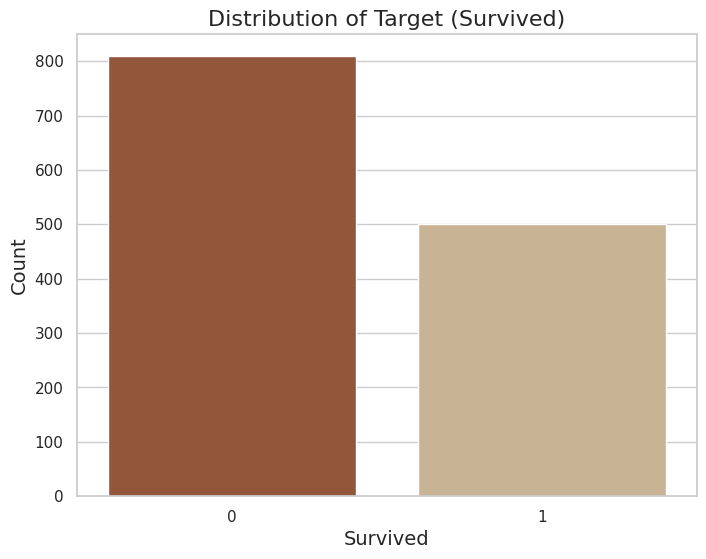

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df, palette=["sienna", "tan"])
plt.title('Distribution of Target (Survived)', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

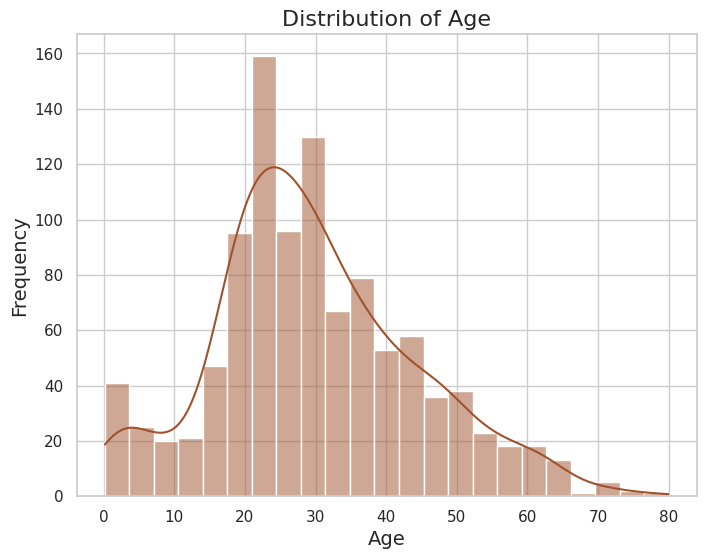

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'].dropna(), kde=True, color="sienna")
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [23]:
print(df.dtypes)

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


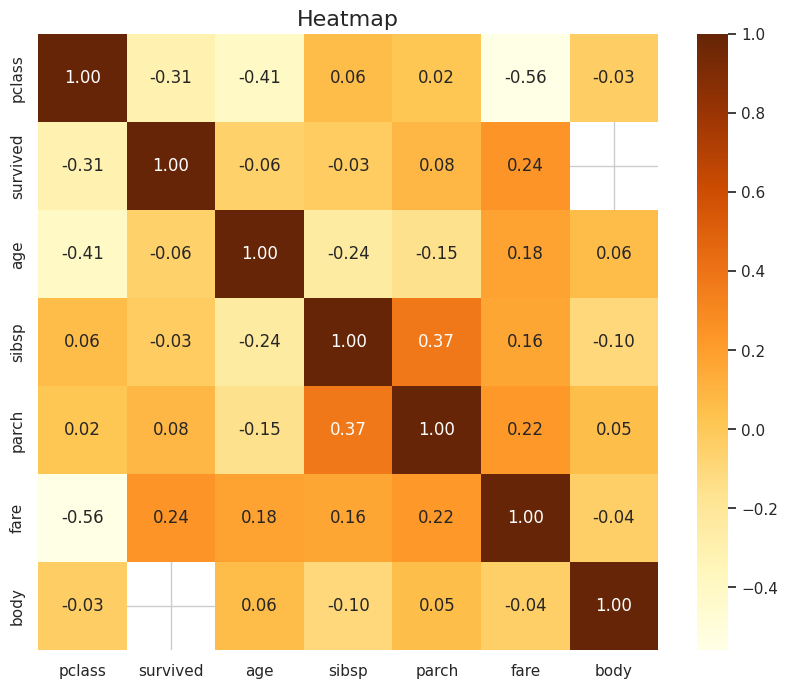

In [24]:
plt.figure(figsize=(10, 8))
df_numeric = df.select_dtypes(include=['number']).dropna(axis=1, how='all')
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='YlOrBr', fmt=".2f")
plt.title('Heatmap', fontsize=16)
plt.show()

In [25]:
df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,0


In [26]:
print(df['age'].isnull().sum())

imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])

print(df.isnull().sum())

263
pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin           0
embarked        0
boat            0
body         1188
home.dest       0
dtype: int64


In [27]:
print(df['body'].isnull().sum())

imputer = SimpleImputer(strategy='median')
df['body'] = imputer.fit_transform(df[['body']])

print(df.isnull().sum())

1188
pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         1
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


In [28]:
df = df.dropna(subset=['fare'])
print(df.isnull().sum())

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


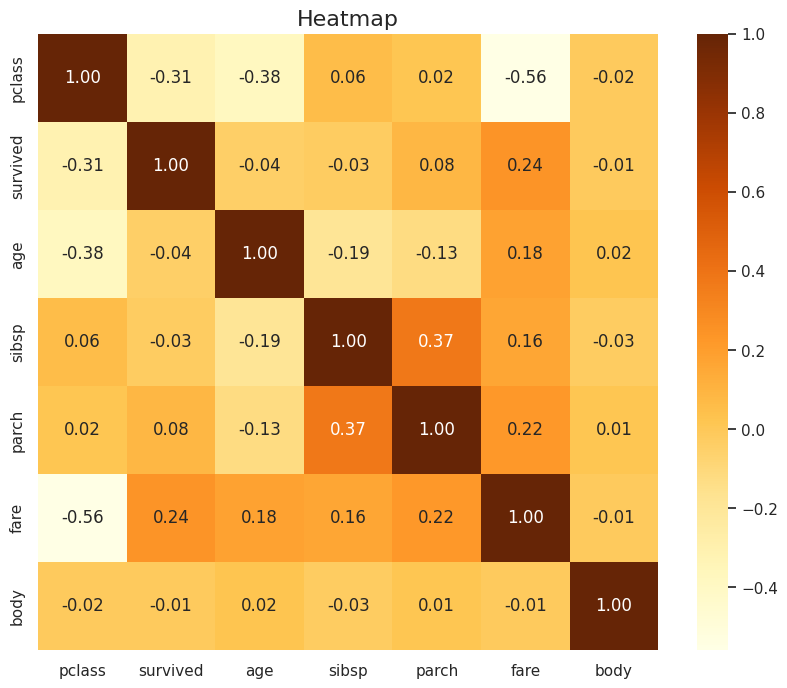

In [29]:
plt.figure(figsize=(10, 8))
df_numeric = df.select_dtypes(include=['number']).dropna(axis=1, how='all')
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='YlOrBr', fmt=".2f")
plt.title('Heatmap', fontsize=16)
plt.show()

In [30]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 0.9847328244274809
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       156
           1       0.99      0.97      0.98       106

    accuracy                           0.98       262
   macro avg       0.99      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262

Confusion Matrix:
 [[155   1]
 [  3 103]]


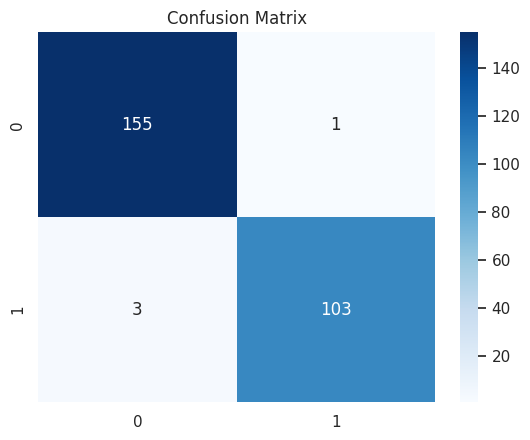

In [33]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()